<a href="https://colab.research.google.com/github/IshanBhanuka/Predict-bitcoin-priceswith_ARIMA/blob/main/Predict_bitcoin_priceswith_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

In [15]:
df = yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [16]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-02-22,51854.644531,52009.613281,50926.292969,51304.972656,51304.972656,25413900611
2024-02-23,51283.906250,51497.933594,50561.777344,50731.949219,50731.949219,21427078270
2024-02-24,50736.371094,51684.195312,50585.445312,51571.101562,51571.101562,15174077879


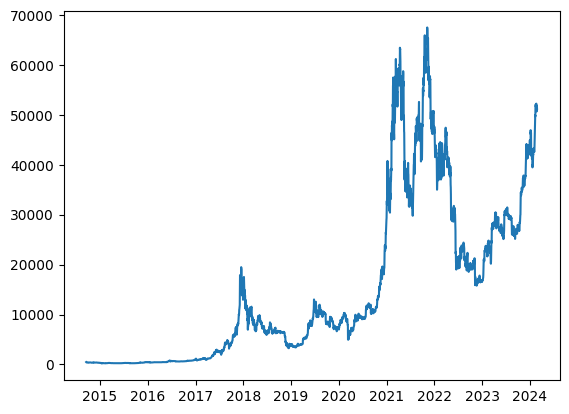

In [17]:
plt.plot(df.index,df['Adj Close'])
plt.show()

In [18]:
# Train test split
to_row = int(len(df)*0.9)

training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])
#training_data

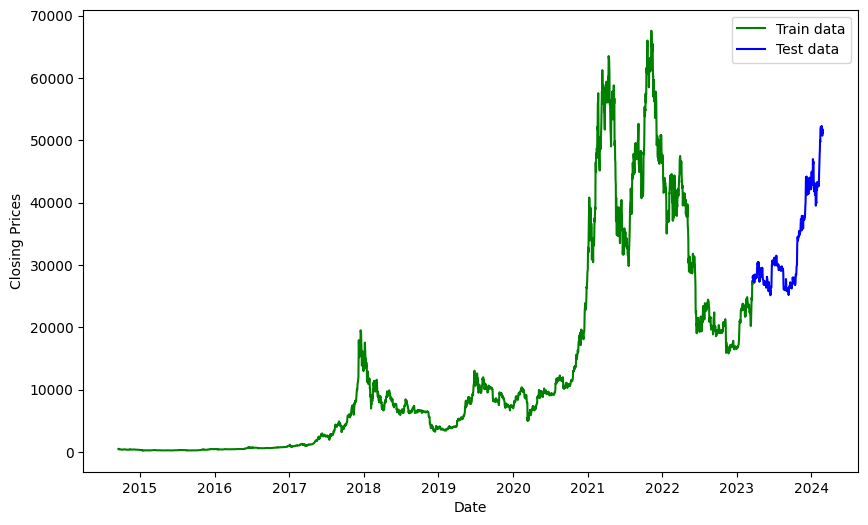

In [7]:
plt.figure(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'],'green', label='Train data')
plt.plot(df[to_row:]['Adj Close'],'blue', label='Test data')
plt.legend()

In [8]:
model_predictions = []
n_test_obser =len(testing_data)


In [19]:
for i in range(n_test_obser):
  model = ARIMA(training_data, order = (4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output)
  model_predictions.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)
  #print(output)
  #break


In [10]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3449
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -27879.786
Date:                Mon, 26 Feb 2024   AIC                          55769.571
Time:                        09:03:00   BIC                          55800.299
Sample:                             0   HQIC                         55780.546
                               - 3449                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0268      0.009     -2.943      0.003      -0.045      -0.009
ar.L2          0.0130      0.009      1.488      0.137      -0.004       0.030
ar.L3          0.0242      0.009      2.573      0.010       0.006       0.043
ar.L4          0.0292      0.008      3.761      0.000       0.014       0.044
sigma2      6.184e+05   5051.009    122.426      0.000    6.08e+05    6.28e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             36201.65
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):             321.87   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

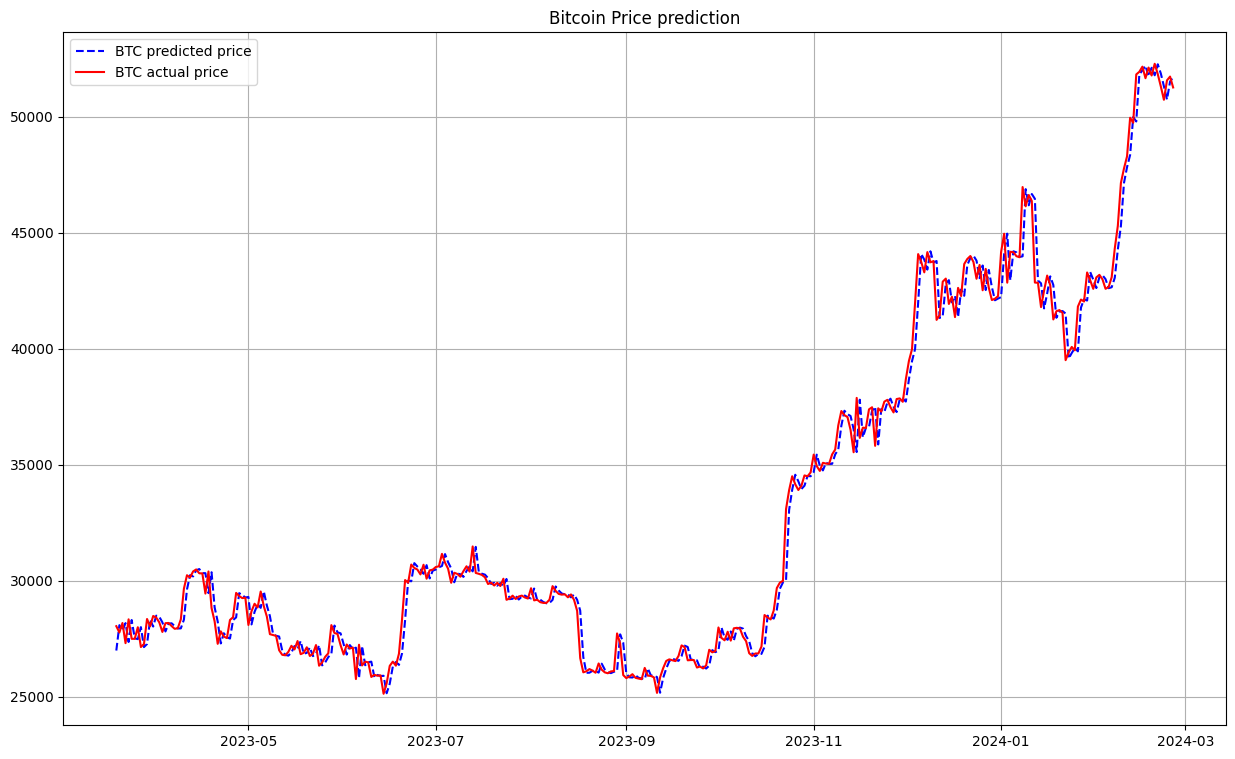

In [13]:
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df[to_row:].index

plt.plot(data_range, model_predictions, color = 'blue', linestyle = 'dashed', label = 'BTC predicted price')
plt.plot(data_range, testing_data, color = 'red', label = 'BTC actual price')

plt.title("Bitcoin Price prediction")
plt.legend()
plt.show()